In [ ]:
#hidden bool func f, input string of bits, 
#returns 0 or 1 
#constant func returns all 0s or all 1s for any inpout 
#balanced func returns 0s for exactly half of all inputs and 1s for other half

In [1]:
#func f implemented as quantum oracle, maps state |x>|y>
#to |x>|y addition modulo 2 f(x)>

#prepare 2 quantum registers, 1st: n qubit register init |0>
    #second is one qubit register init |1>

#apply hadamard gate to each qubit

#apply quantum oracle

#apply hadamard gate to each qubit in first register

#measure first register


#if f(x) = 0, apply I gate to qubit in register 2
# if f(x) = 1,apply X gate to qubit in register 2


In [3]:
import numpy as np

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

from qiskit.visualization import plot_histogram 

In [6]:
#length of n bit input string 
n =3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘

In [10]:
balanced_oracle = QuantumCircuit(n+1)
b_str= "101"

#Place X-Gates
for qubit in range(len(b_str)):
    if b_str[qubit] == "1":
        balanced_oracle.x(qubit)
balanced_oracle.draw()

#Use barrier as divider
balanced_oracle.barrier()

#Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit,n)

balanced_oracle.barrier()

#Place X-gates 
for qubit in range(len(b_str)):
    if b_str[qubit] == "1":
        balanced_oracle.x(qubit)
balanced_oracle.draw()



┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

In [17]:
dj_circuit = QuantumCircuit(n+1, n)

#Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

#Put qubit in state | ->
dj_circuit.x(n)
dj_circuit.h(n)

#Add oracle 
dj_circuit = dj_circuit.compose(balanced_oracle)

#Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

#Measure
for i in range(n):
    dj_circuit.measure(i,i)

#Display Circuit
dj_circuit.draw()

┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├┤ H ├─░─┤M├──────
     ├───┤└───┘ ░   │             ░ ├───┤└───┘ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├──────░──╫─┤M├───
     ├───┤┌───┐ ░   │    │        ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c: 3/═════════════════════════════════════════════╩══╩══╩═
                                                  0  1  2

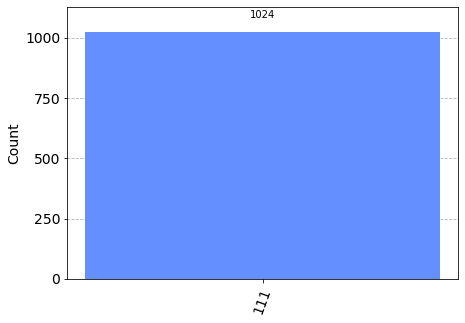

In [18]:
#user local simulator
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(dj_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

In [ ]:
#Generalized Circuits